In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv("loan_data_v3.csv")

In [4]:
df.head()

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,4847,26.0,male,Associate,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,13802,22.0,female,Bachelor,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,39763,25.0,female,High School,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,39215,31.0,female,Master,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,26369,33.0,female,Associate,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


In [5]:
df.columns

Index(['Unnamed: 0', 'person_age', 'person_gender', 'person_education',
       'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt',
       'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [6]:
df = df.drop(columns=["Unnamed: 0"])

In [7]:
df.isna().sum()

person_age                        488
person_gender                     294
person_education                  422
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         336
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      522
previous_loan_defaults_on_file      0
loan_status                       250
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      7512 non-null   float64
 1   person_gender                   7706 non-null   object 
 2   person_education                7578 non-null   object 
 3   person_income                   8000 non-null   float64
 4   person_emp_exp                  8000 non-null   int64  
 5   person_home_ownership           8000 non-null   object 
 6   loan_amnt                       7664 non-null   float64
 7   loan_intent                     8000 non-null   object 
 8   loan_int_rate                   8000 non-null   float64
 9   loan_percent_income             8000 non-null   float64
 10  cb_person_cred_hist_length      8000 non-null   float64
 11  credit_score                    7478 non-null   float64
 12  previous_loan_defaults_on_file  80

<Axes: >

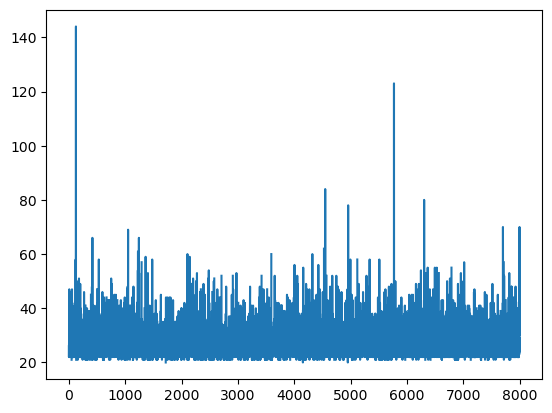

In [10]:
df["person_age"].plot()

In [11]:
df["person_age"] = df["person_age"].fillna(df["person_age"].median())

In [12]:
df.isnull().sum()

person_age                          0
person_gender                     294
person_education                  422
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         336
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      522
previous_loan_defaults_on_file      0
loan_status                       250
dtype: int64

In [13]:
df["person_gender"].value_counts()

person_gender
male      4268
female    3438
Name: count, dtype: int64

In [14]:
df["person_gender"] = df["person_gender"].fillna(df["person_gender"].mode()[0])

In [15]:
df.isnull().sum()

person_age                          0
person_gender                       0
person_education                  422
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         336
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      522
previous_loan_defaults_on_file      0
loan_status                       250
dtype: int64

In [16]:
df["person_education"].value_counts()

person_education
Bachelor       2234
Associate      2051
High School    2017
Master         1172
Doctorate       104
Name: count, dtype: int64

In [17]:
df["person_education"] = df["person_education"].fillna(df["person_education"].mode()[0])

In [18]:
df.isnull().sum()

person_age                          0
person_gender                       0
person_education                    0
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         336
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      522
previous_loan_defaults_on_file      0
loan_status                       250
dtype: int64

In [20]:
df = df.dropna(subset=["loan_status"], axis=0)

In [21]:
df.isnull().sum()

person_age                          0
person_gender                       0
person_education                    0
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         326
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      504
previous_loan_defaults_on_file      0
loan_status                         0
dtype: int64

In [22]:
df["credit_score"].value_counts()

credit_score
648.0    78
646.0    72
672.0    71
635.0    71
647.0    70
         ..
492.0     1
448.0     1
453.0     1
463.0     1
740.0     1
Name: count, Length: 293, dtype: int64

<Axes: >

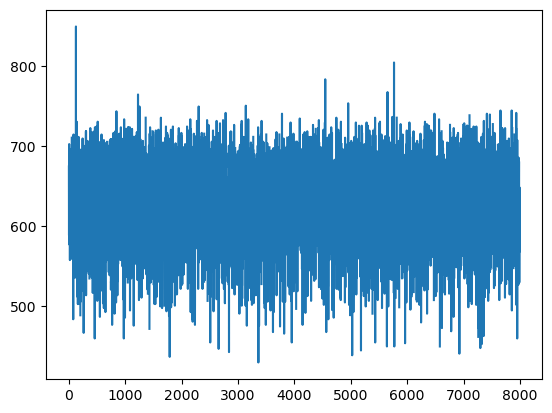

In [23]:
df["credit_score"].plot()

In [24]:
df["credit_score"] = df["credit_score"].fillna(df["credit_score"].median())

In [25]:
df.isnull().sum()

person_age                          0
person_gender                       0
person_education                    0
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         326
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
loan_status                         0
dtype: int64

In [26]:
df["loan_amnt"].value_counts()

loan_amnt
10000.0    578
5000.0     477
12000.0    422
6000.0     405
8000.0     326
          ... 
14320.0      1
7785.0       1
7002.0       1
10495.0      1
15740.0      1
Name: count, Length: 1084, dtype: int64

<Axes: >

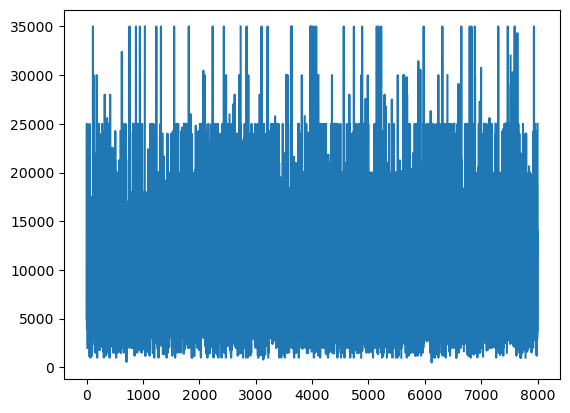

In [27]:
df["loan_amnt"].plot()

In [28]:
df["loan_amnt"] = df["loan_amnt"].fillna(df["loan_amnt"].median())

In [29]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [30]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,26.0,male,Associate,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,22.0,female,Bachelor,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,25.0,female,High School,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,31.0,female,Master,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,33.0,female,Associate,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


In [31]:
df["person_age"].astype(int)

0       26
1       22
2       25
3       31
4       33
        ..
7994    70
7996    26
7997    29
7998    24
7999    28
Name: person_age, Length: 7750, dtype: int64

In [32]:
df["person_gender"].unique()

array(['male', 'female'], dtype=object)

In [33]:
df["person_gender"] = df["person_gender"].map({"male": 0, "female": 1})

In [34]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,26.0,0,Associate,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,22.0,1,Bachelor,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,25.0,1,High School,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,31.0,1,Master,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,33.0,1,Associate,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


In [35]:
df["person_education"].unique()

array(['Associate', 'Bachelor', 'High School', 'Master', 'Doctorate'],
      dtype=object)

In [36]:
education_order = ["High School", "Associate", "Bachelor", "Master", "Doctorate"]
encoder = OrdinalEncoder(categories=[education_order], handle_unknown="use_encoded_value", unknown_value=np.nan)
df[["person_education"]] = encoder.fit_transform(df[["person_education"]])

In [37]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,26.0,0,1.0,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,22.0,1,2.0,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,25.0,1,0.0,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,31.0,1,3.0,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,33.0,1,1.0,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


In [38]:
df["person_education"].unique()

array([1., 2., 0., 3., 4.])

In [39]:
df["person_education"].astype(int)

0       1
1       2
2       0
3       3
4       1
       ..
7994    1
7996    1
7997    2
7998    2
7999    1
Name: person_education, Length: 7750, dtype: int64

In [40]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,26.0,0,1.0,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,22.0,1,2.0,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,25.0,1,0.0,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,31.0,1,3.0,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,33.0,1,1.0,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


In [41]:
df["person_home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [42]:
df = pd.concat([df, pd.get_dummies(df["person_home_ownership"])], axis=1)
df = df.drop(columns=["person_home_ownership"])

In [43]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,MORTGAGE,OTHER,OWN,RENT
0,26.0,0,1.0,43996.0,4,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0,False,False,False,True
1,22.0,1,2.0,115708.0,0,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0,True,False,False,False
2,25.0,1,0.0,57827.0,0,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0,False,False,False,True
3,31.0,1,3.0,126727.0,9,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0,False,False,False,True
4,33.0,1,1.0,120987.0,10,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0,False,False,True,False


In [44]:
df["loan_intent"].unique()

array(['VENTURE', 'EDUCATION', 'PERSONAL', 'DEBTCONSOLIDATION', 'MEDICAL',
       'HOMEIMPROVEMENT'], dtype=object)

In [45]:
df = pd.concat([df, pd.get_dummies(df["loan_intent"], prefix="loan_intent")], axis=1)
df = df.drop(columns=["loan_intent"])

In [46]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,MORTGAGE,OTHER,OWN,RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,26.0,0,1.0,43996.0,4,5000.0,10.37,0.11,4.0,675.0,...,False,False,False,True,False,False,False,False,False,True
1,22.0,1,2.0,115708.0,0,20000.0,7.88,0.17,3.0,635.0,...,True,False,False,False,False,True,False,False,False,False
2,25.0,1,0.0,57827.0,0,6000.0,11.60,0.10,4.0,589.0,...,False,False,False,True,False,False,False,False,True,False
3,31.0,1,3.0,126727.0,9,24000.0,10.27,0.19,7.0,644.0,...,False,False,False,True,True,False,False,False,False,False
4,33.0,1,1.0,120987.0,10,25000.0,12.18,0.21,10.0,644.0,...,False,False,True,False,False,False,False,True,False,False


In [47]:
df["person_age"] = df["person_age"].astype(int)
df["person_education"] = df["person_education"].astype(int)

In [48]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,MORTGAGE,OTHER,OWN,RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,26,0,1,43996.0,4,5000.0,10.37,0.11,4.0,675.0,...,False,False,False,True,False,False,False,False,False,True
1,22,1,2,115708.0,0,20000.0,7.88,0.17,3.0,635.0,...,True,False,False,False,False,True,False,False,False,False
2,25,1,0,57827.0,0,6000.0,11.60,0.10,4.0,589.0,...,False,False,False,True,False,False,False,False,True,False
3,31,1,3,126727.0,9,24000.0,10.27,0.19,7.0,644.0,...,False,False,False,True,True,False,False,False,False,False
4,33,1,1,120987.0,10,25000.0,12.18,0.21,10.0,644.0,...,False,False,True,False,False,False,False,True,False,False


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7750 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      7750 non-null   int64  
 1   person_gender                   7750 non-null   int64  
 2   person_education                7750 non-null   int64  
 3   person_income                   7750 non-null   float64
 4   person_emp_exp                  7750 non-null   int64  
 5   loan_amnt                       7750 non-null   float64
 6   loan_int_rate                   7750 non-null   float64
 7   loan_percent_income             7750 non-null   float64
 8   cb_person_cred_hist_length      7750 non-null   float64
 9   credit_score                    7750 non-null   float64
 10  previous_loan_defaults_on_file  7750 non-null   object 
 11  loan_status                     7750 non-null   float64
 12  MORTGAGE                        7750 no

In [50]:
df["previous_loan_defaults_on_file"].unique()

array(['No', 'Yes'], dtype=object)

In [51]:
df["previous_loan_defaults_on_file"] = df["previous_loan_defaults_on_file"].map({"Yes": 1, "No": 0})

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7750 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      7750 non-null   int64  
 1   person_gender                   7750 non-null   int64  
 2   person_education                7750 non-null   int64  
 3   person_income                   7750 non-null   float64
 4   person_emp_exp                  7750 non-null   int64  
 5   loan_amnt                       7750 non-null   float64
 6   loan_int_rate                   7750 non-null   float64
 7   loan_percent_income             7750 non-null   float64
 8   cb_person_cred_hist_length      7750 non-null   float64
 9   credit_score                    7750 non-null   float64
 10  previous_loan_defaults_on_file  7750 non-null   int64  
 11  loan_status                     7750 non-null   float64
 12  MORTGAGE                        7750 no

In [53]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [54]:
X, y = df.drop(columns=["loan_status"]), df["loan_status"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [57]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

results = {}
for name, model in models.items():
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)

    results[name] = {
        "Accuracy": accuracy_score(test_y, pred_y),
        "Precision": precision_score(test_y, pred_y),
        "Recall": recall_score(test_y, pred_y),
        "F1-Score": f1_score(test_y, pred_y),
        "ROC-AUC": roc_auc_score(test_y, model.predict_proba(test_X)[:, 1]),
    }
results_df = pd.DataFrame(results).T
print(results_df)
print(f"\nBest Model: {results_df["F1-Score"].idxmax()}")

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.898065   0.755224  0.768997  0.762048  0.953768
Decision Tree        0.876129   0.702065  0.723404  0.712575  0.820343
Random Forest        0.930968   0.902174  0.756839  0.823140  0.968314
Gradient Boosting    0.932258   0.888889  0.778116  0.829822  0.972291

Best Model: Gradient Boosting
